# `fast.ai` starter image classifier
Fast.ai [tutorial](https://docs.fast.ai/tutorial.vision.html).

In [1]:
from fastai.vision.all import *

In [2]:
# suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = Path("../data_classifier_png")
assert path.exists()

In [4]:
path.ls()

(#750) [Path('../data_classifier_png/DRC_62391_S72_WARNING.png'),Path('../data_classifier_png/2020081999282_matrix_repeat_2_batch2_B3_5_OK.png'),Path('../data_classifier_png/DRC_62391_S140_OK.png'),Path('../data_classifier_png/DRC_62391_S302_OK.png'),Path('../data_classifier_png/2020090899282_matrix_repeat_3_batch2_B1_7_OK.png'),Path('../data_classifier_png/2020082699282_matrix_repeat_2_batch3_B3_6_OK.png'),Path('../data_classifier_png/Plate-1_OK.png'),Path('../data_classifier_png/CC2001864_30_CC0417483_GAMG_WARNING.png'),Path('../data_classifier_png/DRC_62391_S41_OK.png'),Path('../data_classifier_png/17_WARNING.png')...]

In [5]:
files = get_image_files(path)
len(files)

749

In [6]:
def label_func(x):
    x = Path(x)
    return x.name.split("_")[-1].split(".")[0]

In [7]:
label_func(files[0])

'WARNING'

In [8]:
# load image example to memory
img = PILImage.create(files[0])
img

In [9]:
dls = ImageDataLoaders.from_name_func(
    path, files, label_func, valid_pct=0.2, seed=42,
    item_tfms=Resize((16, 24)), batch_tfms=None
)

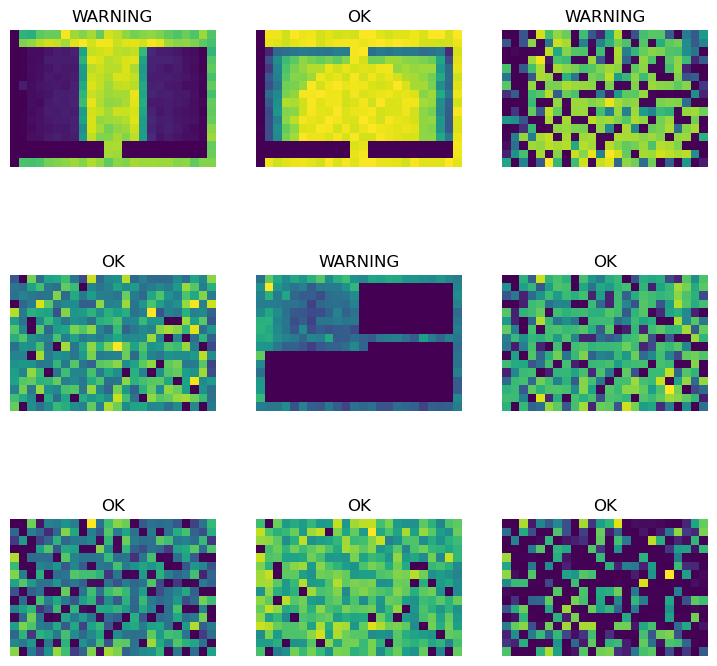

In [10]:
dls.show_batch()

In [11]:
learn = vision_learner(dls, resnet34, metrics=error_rate)

SuggestedLRs(valley=0.0010000000474974513)

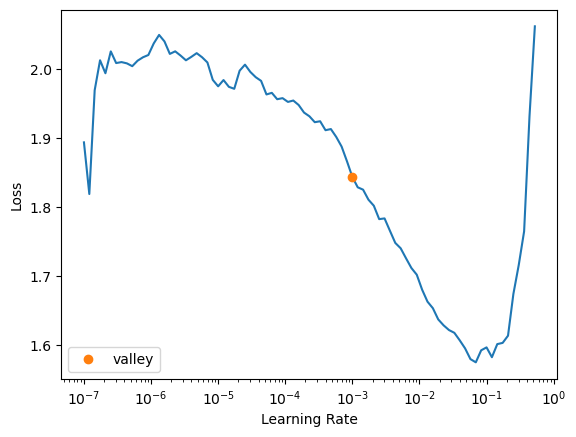

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(3, 1e-3)

epoch,train_loss,valid_loss,error_rate,time
0,1.758915,0.907785,0.429530,00:01
1,1.621824,0.805520,0.315436,00:01
2,1.504589,0.862766,0.308725,00:01


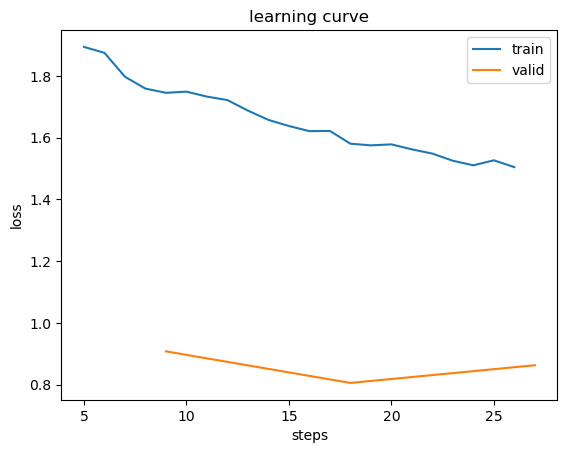

In [15]:
# plot losses
learn.recorder.plot_loss();

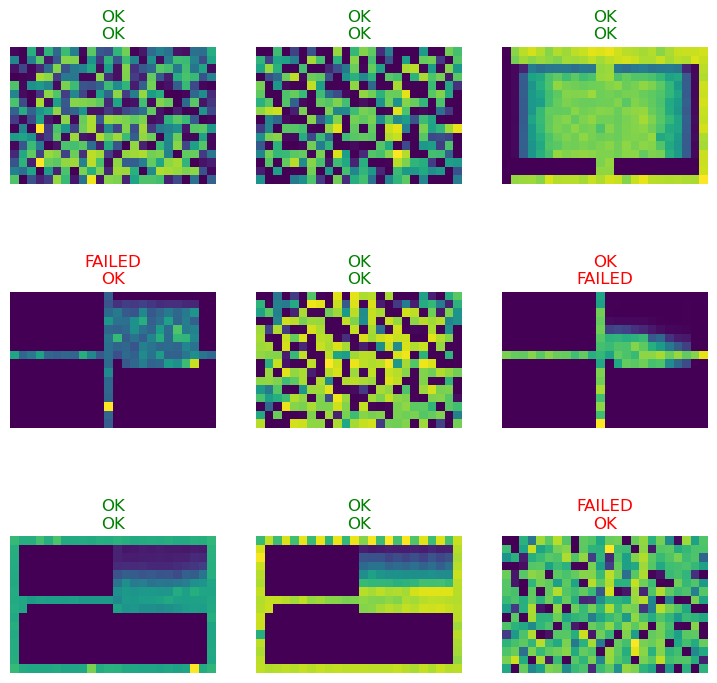

In [16]:
learn.show_results()

In [17]:
interp = Interpretation.from_learner(learn)

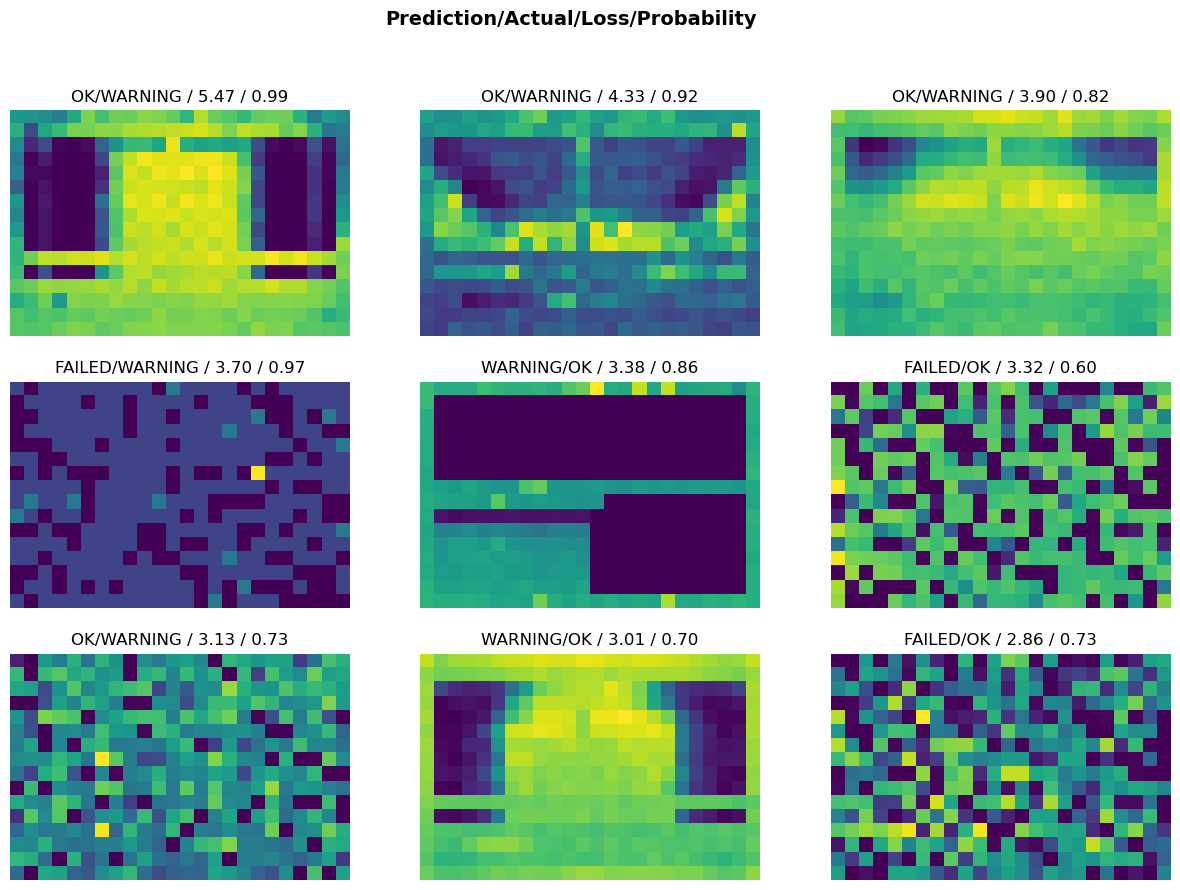

In [18]:
interp.plot_top_losses(9, figsize=(15,10))

In [19]:
classification_interpretation = ClassificationInterpretation.from_learner(learn)

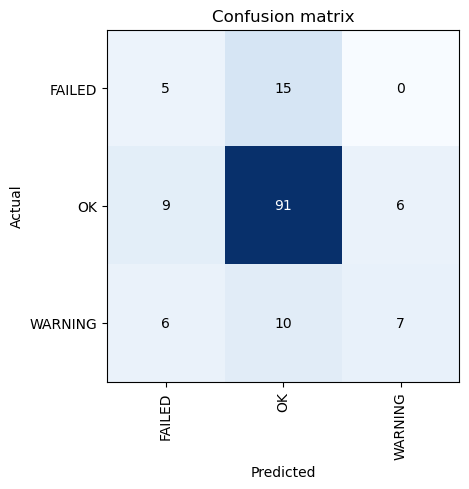

In [20]:
classification_interpretation.plot_confusion_matrix()

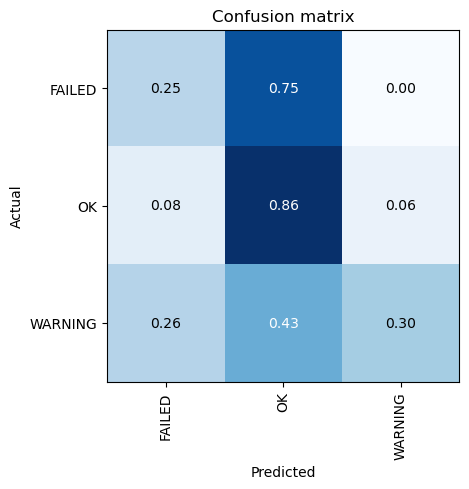

In [21]:
classification_interpretation.plot_confusion_matrix(normalize=True)